Usar su implementación anterior para hallar todos los ceros de las siguientes funciones:

In [ ]:
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Multidimensional Newton's method

In [16]:
def newton_multidimensional(F, J, x0, max_iter=100, tol=1e-7):
    """
    Método de Newton multidimensional para encontrar los ceros de una función.

    Args:
        F: Función vectorial F(x) que queremos encontrar sus ceros.
        J: Función que calcula la matriz jacobiana de F en x.
        x0: Punto inicial.
        tol: Tolerancia para la convergencia.
        max_iter: Número máximo de iteraciones.

    Returns:
        Solución x tal que F(x) = 0.
    """
    x = x0
    aproximations = [x]
    for i in range(max_iter):
        Fx = F(x)
        Jx = J(x)
        
        if np.linalg.norm(Fx) < tol:
            return aproximations, x
        
        delta_x = np.linalg.solve(Jx, -Fx)
        x = x + delta_x
        aproximations.append(x)
    
    raise ValueError("No se alcanzó la convergencia.")


### Generate random initial points

In [ ]:
def find_initial_guess(F, bounds, num_samples=1000):
    best_x = None
    best_value = float('inf')
    
    for _ in range(num_samples):
        x = np.array([np.random.uniform(low, high) for low, high in bounds])
        value = np.linalg.norm(F(x))
        
        if value < best_value:
            best_value = value
            best_x = x
    
    return best_x



### Find all zeros into a funtion

In [ ]:
def find_all_zeros(F, J, initialPoints, maxIter=100, tol=1e-7):
    solutions = []
    unique_solutions = []
    
    initial_points = initialPoints
    
    def process_point(x0):
        try:
            _, solution = newton_multidimensional(F, J, x0, maxIter, tol)
            return solution
        except ValueError:
            return None
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(process_point, initial_points))
    
    # Filtra soluciones y garantiza unicidad
    for solution in results:
        if solution is not None and not np.any(np.isnan(solution)):
            if not any(np.allclose(solution, unique_sol, atol=tol) for unique_sol in unique_solutions):
                unique_solutions.append(solution)
    
    return unique_solutions



### Graphs zeros 

In [ ]:
def plot_function_and_zeros(F, zeros, bounds, resolution=100):
    """
    Grafica la función F y los ceros encontrados.

    Args:
        F: Función vectorial F(x).
        zeros: Lista de ceros encontrados.
        bounds: Límites para las variables [x_min, x_max].
        resolution: Resolución de la gráfica.
    """
    num_vars = len(bounds)
    
    if num_vars == 2:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        x = np.linspace(bounds[0][0], bounds[0][1], resolution)
        y = np.linspace(bounds[1][0], bounds[1][1], resolution)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros(X.shape)
        
        for i in range(resolution):
            for j in range(resolution):
                Z[i, j] = np.linalg.norm(F([X[i, j], Y[i, j]]))
        
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
        
        for zero in zeros:
            ax.scatter(zero[0], zero[1], 0, color='red', s=100, label='Cero encontrado')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('F(x, y)')
        
    elif num_vars == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Crea una rejilla de puntos
        x = np.linspace(bounds[0][0], bounds[0][1], resolution)
        y = np.linspace(bounds[1][0], bounds[1][1], resolution)
        z = np.linspace(bounds[2][0], bounds[2][1], resolution)
        X, Y, Z = np.meshgrid(x, y, z)
        
        # Coloca los ceros en el espacio 3D
        for zero in zeros:
            ax.scatter(zero[0], zero[1], zero[2], color='red', s=100, label='Cero encontrado')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
    plt.legend()
    plt.show()

1. 
$$
F: \mathbb R^{2} -> \mathbb R^{2}, F(x,y) = (
\begin{matrix}
3x^{2} - y^{2}\\
3xy^{2} - x^{3}-1
\end{matrix})

$$

In [17]:
def F1 (vars):
    x, y = vars
    return np.array([3*x**2 - y**2, 3*x*y**2 - x**3 - 1])

Sacamos el jacobiano:
- Derivadas con respecto a x:
$$
\frac{ dx}{d} 3x^{2} - y^{2} = 6x
$$
$$
\frac{ dx}{d} 3xy^{2} - x^{3} - 1 = 3y^{2} - 3x^{2} 
$$

- Derivadas con respecto a y:
$$
\frac{ dy}{d} 3x^{2} - y^{2} = -2y
$$
$$
\frac{ dy}{d} 3xy^{2} - x^{3} - 1 = 6xy
$$

In [18]:
def J1 (vars):
    x, y = vars
    return np.array([[6*x, -2*y], [3*y**2 - 3*x**2, 6*x*y]])

Realizar el calculo de los ceros posibles

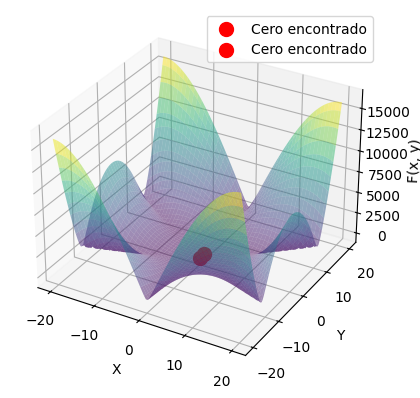

Zeros found:
Zero: [0.5       0.8660254], F1(zero): [-1.87172500e-12  3.15185922e-09]
Zero: [ 0.5       -0.8660254], F1(zero): [1.98419059e-12 1.55762692e-09]


In [19]:
# Define domain bounds
lower_bound = -20
upper_bound = 20
dimension = 2
num_points = 5000

bounds = [(lower_bound, upper_bound) for _ in range(dimension)]
poinst = [np.random.uniform(lower_bound, upper_bound, dimension) for _ in range(num_points)]

# Find all zeros
zeros = find_all_zeros(F1, J1,poinst)


plot_function_and_zeros(F1, zeros, bounds)
print("Zeros found:")
for zero in zeros:
    # Print zeros and function values
    print(f"Zero: {zero}, F1(zero): {F1(zero)}")

2. 
$$
G: \mathbb R^{3} -> \mathbb R^{3}, G(x,y, z) = (
\begin{matrix}
12x - 3y^{2} -4z -7.17\\
x + 10y - z - 11.54 \\
y^{3} - 7z^{3} - 7.631
\end{matrix})

$$

In [20]:
def G(vars):
    x, y, z = vars
    return np.array([12*x - 3*y**2 - 4*z - 7.17, x + 10*y - z - 11.54, y**3 - 7*z**3 - 7.631 ])

Sacamos el jacobiano:
- Derivadas con respecto a x:
$$
\frac{ dx}{d} 12x - 3y^{2} - 4z -7.17 = 12x
$$
$$
\frac{ dx}{d} x + 10y - z - 11.54 = 1
$$

$$
\frac{ dx}{d} y^{3} - 7z^{3} - 7.631 = 0
$$

- Derivadas con respecto a y:
$$
\frac{ dy}{d} 12x - 3y^{2} - 4z -7.17 = -6y
$$
$$
\frac{ dy}{d} x + 10y - z - 11.54 = 10
$$

$$
\frac{ dy}{d} y^{3} - 7z^{3} - 7.631 = 3y^{2}
$$

- Derivadas con respecto a z:
$$
\frac{ dy}{d} 12x - 3y^{2} - 4z -7.17 = -4
$$
$$
\frac{ dy}{d} x + 10y - z - 11.54 = -1
$$

$$
\frac{ dy}{d} y^{3} - 7z^{3} - 7.631 = -21z^{2}
$$





In [21]:
def JG(vars):
    x, y, z = vars
    return np.array([[12, -6*y, -4], [1, 10, -1], [0, 3*y**2, -21*z**2]])

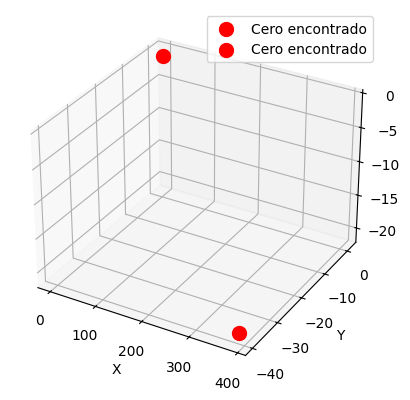

Zeros found:
Zero: [ 0.52212818  1.00363013 -0.98157054], G(zero): [0.00000000e+00 0.00000000e+00 2.22044605e-14]
Zero: [387.86350231 -39.708213   -20.75862767], G(zero): [-6.92779167e-14  4.26325641e-14  4.48778792e-11]


In [23]:
bouns = [(lower_bound, upper_bound) for _ in range(3)]
points = [np.random.uniform(lower_bound, upper_bound, 3) for _ in range(num_points)]

zeros = find_all_zeros(G, JG, points)


plot_function_and_zeros(G, zeros, bounds=bouns)
print("Zeros found:")
for zero in zeros:
    # Print zeros and function values
    print(f"Zero: {zero}, G(zero): {G(zero)}")